100%|██████████| 63.6M/63.6M [00:00<00:00, 144MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/amananandrai/complete-eeg-dataset/versions/1


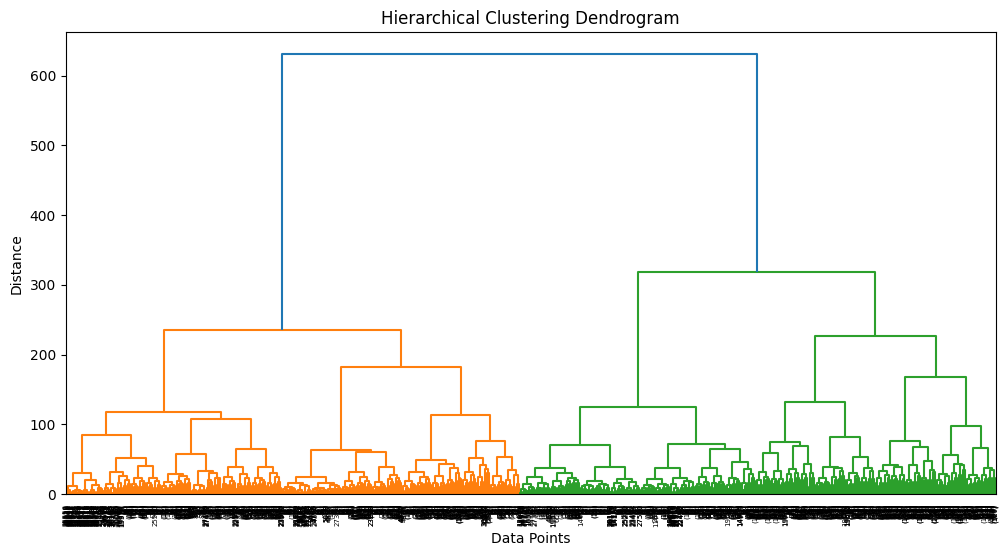

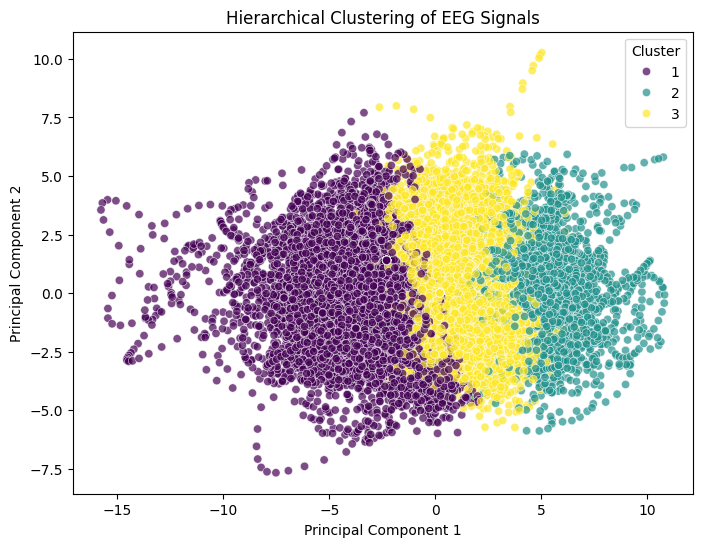

Cluster Distribution:
Cluster
3    15893
1    11323
2     3783
Name: count, dtype: int64


In [15]:
import pandas as pd  # For handling data
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced visualizations
from sklearn.preprocessing import StandardScaler  # For feature scaling
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster  # Hierarchical Clustering
from sklearn.decomposition import PCA  # For dimensionality reduction

import kagglehub

# Download latest version
path = kagglehub.dataset_download("amananandrai/complete-eeg-dataset")

print("Path to dataset files:", path)

# Rename columns to avoid potential numerical naming issues
df.columns = [f'Feature_{i+1}' for i in range(df.shape[1])]

# Assume the last column contains labels and remove it for unsupervised learning
df.drop(columns=[df.columns[-1]], inplace=True)

# Normalize the data for better clustering performance
scaler = StandardScaler()  # Initialize a standard scaler
X_scaled = scaler.fit_transform(df)  # Apply normalization to the dataset

# Perform Hierarchical Clustering using Ward's method
linkage_matrix = linkage(X_scaled, method='ward')  # Compute hierarchical clusters

# Plot the Dendrogram to visualize hierarchical relationships
plt.figure(figsize=(12, 6))  # Set figure size
dendrogram(linkage_matrix, truncate_mode='level', p=10)  # Show the last 10 levels
plt.xlabel("Data Points")  # Label for X-axis
plt.ylabel("Distance")  # Label for Y-axis
plt.title("Hierarchical Clustering Dendrogram")  # Title of the dendrogram plot
plt.show()  # Display the plot

# Define the number of clusters based on the dendrogram analysis
optimal_clusters = 3  # Adjust this value according to the dendrogram structure
df['Cluster'] = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')  # Assign clusters to data points

# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)  # Initialize PCA with 2 components
X_pca = pca.fit_transform(X_scaled)  # Apply PCA transformation
df['PCA1'] = X_pca[:, 0]  # Store first principal component
df['PCA2'] = X_pca[:, 1]  # Store second principal component

# Plot clusters using PCA-transformed data
plt.figure(figsize=(8, 6))  # Set figure size
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', alpha=0.7)  # Scatter plot with clusters
plt.xlabel("Principal Component 1")  # Label for X-axis
plt.ylabel("Principal Component 2")  # Label for Y-axis
plt.title("Hierarchical Clustering of EEG Signals")  # Title of the plot
plt.legend(title="Cluster")  # Add legend for clusters
plt.show()  # Display the plot

# Display the number of samples in each cluster
print("Cluster Distribution:")
print(df['Cluster'].value_counts())  # Print count of data points per cluster
